In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dai = pd.read_feather('data/dai.feather')
mkr = pd.read_feather('data/maker.feather')

In [5]:
print(dai.shape)
print(dai.head())

(1196302, 6)
                                           to  \
0                                               
1  0x6b175474e89094c44da98b954eedeac495271d0f   
2  0x6b175474e89094c44da98b954eedeac495271d0f   
3  0x6b175474e89094c44da98b954eedeac495271d0f   
4  0x6b175474e89094c44da98b954eedeac495271d0f   

                                         from  value           gas  \
0  0xb5b06a16621616875a6c2637948bf98ea57c58fa    0.0  1.623228e-12   
1  0x00ecd4635c80d47a8b5ffbfd2eb794e0ce6a8689    0.0  4.727000e-04   
2  0xd9d1e81bb35db066986fa441113a27708663d70b    0.0  5.672400e-04   
3  0xf14c1373d44cc23ada88acd605bba85ddc03d65b    0.0  9.352535e-05   
4  0xf1ff09e1fb55702b182058a8514a0917abdd582f    0.0  5.672400e-04   

                 time  nonce  
0 2019-11-13 20:17:57   None  
1 2019-11-17 13:21:39  24346  
2 2019-11-17 18:20:44      0  
3 2019-11-17 19:16:27    105  
4 2019-11-17 20:00:31      0  


In [6]:
print(mkr.shape)
print(mkr.head())

(598146, 6)
                                           to  \
0                                               
1  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   
2  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   
3  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   
4  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   

                                         from  value           gas  \
0  0x731c6f8c754fa404cfcc2ed8035ef79262f65702    0.0  7.531820e-13   
1  0x00daa9a2d88bed5a29a6ca93e0b7d860cd1d403f    0.0  4.592100e-05   
2  0x00daa9a2d88bed5a29a6ca93e0b7d860cd1d403f    0.0  3.736200e-05   
3  0x00daa9a2d88bed5a29a6ca93e0b7d860cd1d403f    0.0  4.592100e-05   
4  0x00daa9a2d88bed5a29a6ca93e0b7d860cd1d403f    0.0  4.592100e-05   

                 time nonce  
0 2017-11-25 19:24:17  None  
1 2017-11-25 20:11:58  5420  
2 2017-11-25 20:26:46  5429  
3 2017-11-25 20:34:23  5433  
4 2017-11-27 04:05:47  5437  


In [7]:
dai.time = pd.to_datetime(dai.time, format="%Y-%m-%d %H:%M:%S")

In [8]:
mkr.time = pd.to_datetime(mkr.time, format="%Y-%m-%d %H:%M:%S")

In [11]:
dai_time = dai.copy()
dai_time.set_index(dai_time.time, inplace=True)
x = dai_time.index
y = dai_time.resample('D').count()['to']

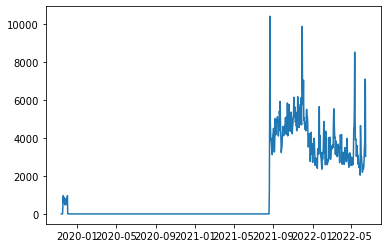

In [14]:
plt.plot(y)
plt.show()

In [15]:
mkr_time = mkr.copy()
mkr_time.set_index(mkr_time.time, inplace=True)
x = mkr_time.index
y = mkr_time.resample('D').count()['to']

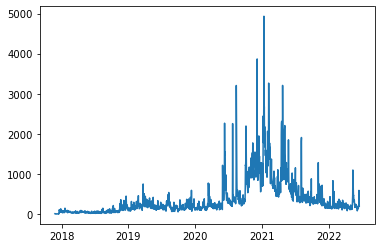

In [16]:
plt.plot(y)
plt.show()

In [19]:
dai.tail()

,to,from,value,gas,time,nonce
1196297,0x6b175474e89094c44da98b954eedeac495271d0f,0x99724a6eaf560267c369cd632dc9b6f04636a799,0.0,0.003221,2022-04-11 17:01:42,7
1196298,0x6b175474e89094c44da98b954eedeac495271d0f,0xd4bddf5e3d0435d7a6214a0b949c7bb58621f37c,0.0,0.002631,2022-04-11 17:02:09,108950
1196299,0x6b175474e89094c44da98b954eedeac495271d0f,0x28c6c06298d514db089934071355e5743bf21d60,0.0,0.002625,2022-04-11 17:02:31,3720958
1196300,0x6b175474e89094c44da98b954eedeac495271d0f,0x46340b20830761efd32832a74d7169b29feb9758,0.0,0.004639,2022-04-11 17:03:22,5824674
1196301,0x6b175474e89094c44da98b954eedeac495271d0f,0x6a8a53b3845748b46f9c02b43edcf5a88952ee45,0.0,0.006220,2022-04-11 17:03:53,13


In [21]:
day_mean = dai_time.resample('D').mean()

In [26]:
day_mean.value.count()

320

In [27]:
day_mean.to_csv('dai_mean.csv')

<AxesSubplot:xlabel='value', ylabel='Count'>

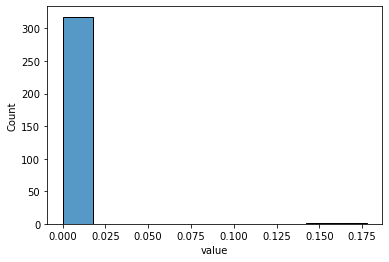

In [25]:
sns.histplot(day_mean.value)

In [28]:
mkr.to_csv('mkr.csv')